# Classy Fourier module

First, import the packages as usual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})


Once again, we are going to need to ask for a specific output.

In addition to the standard linear matter power spectrum, CLASS can also provide the non-linear power spectrum computed with either HMcode or Halofit, relying on the halo model of large scale structure.

Let's compare the HMcode and Halofit predictions.

In [2]:
cosmo_hm = Class()
cosmo_hm.set({'perturbations_verbose':1,
           'non_linear':'hmcode',
           'output':'mPk'})

cosmo_hf = Class()
cosmo_hf.set({'perturbations_verbose':1,
           'non_linear':'halofit',
           'output':'mPk'})

True

Let's now define a k array for the power spectrum, and extract it for plotting.

In [3]:
k = np.geomspace(10**-4,1)
z = 0

Pk_lin = cosmo_hm.get_pk_all(k,z, nonlinear=False)
Pk_HMcode = cosmo_hm.get_pk_all(k,z, nonlinear=True)
Pk_halofit = cosmo_hf.get_pk_all(k,z, nonlinear=True)



Computing sources
Computing sources


Now let us do a basic plot comparint the linear and non-linear matter power spectra.

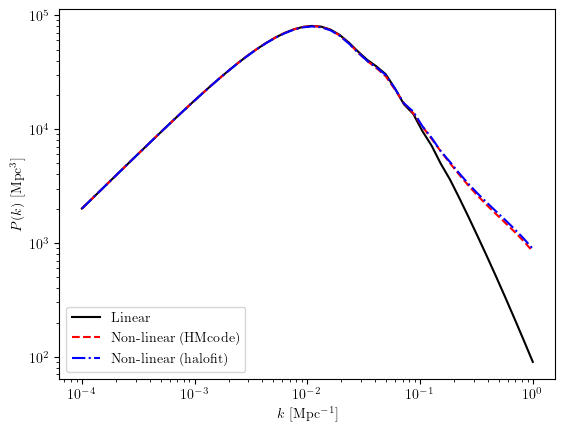

In [5]:
plt.loglog(k,Pk_lin, 'k', label='Linear')
plt.loglog(k,Pk_HMcode, 'r--',label='Non-linear (HMcode)')
plt.loglog(k,Pk_halofit, 'b-.',label='Non-linear (halofit)')

plt.xlabel('$k$ [Mpc$^{-1}]$')
plt.ylabel('$P(k)$ [Mpc$^{3}]$')

plt.legend()



Here, the non-linear predictions clearly show the expected enhanced structure on small scales, with only a small difference between the implementations.

Let's examine just how small the difference is.

Text(0, 0.5, '$\\Delta P(k) / P_{\\tt HMcode}(k)$')

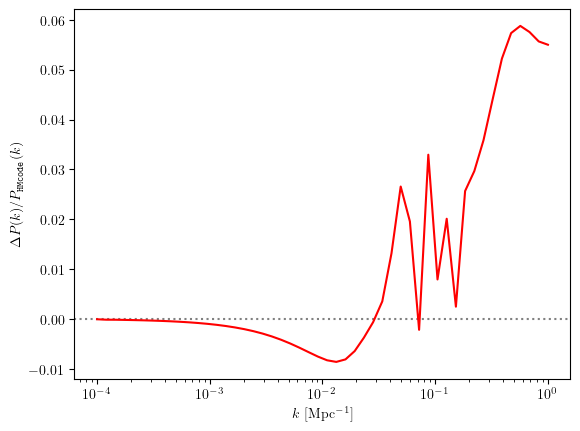

In [ ]:
plt.axhline(0,color='0.5',linestyle=':')

plt.semilogx(k,Pk_halofit/Pk_HMcode -1, 'r',label='Non-linear (HMcode)')


plt.xlabel('$k$ [Mpc$^{-1}]$')
plt.ylabel('$\\Delta P(k) / P_{\\tt HMcode}(k)$')

So while it does not look like much,it is still on the scale of several percent - which could matter for precision cosmology!

For example, let us return to our massive neutrino cosmology to look at the impact of neutrino masses.

In [ ]:
cosmo_mnu = Class()
cosmo_mnu.set({'N_ncdm':1, 
               'm_ncdm':0.1, 
               'Neff':3.044,
               'non_linear':'hmcode',
               'output':'mPk'})

Pk_mnu_lin = cosmo_mnu.get_pk_all(k,z, nonlinear=False)
Pk_mnu_HMcode = cosmo_mnu.get_pk_all(k,z, nonlinear=True)

For good measure, let's confirm that these cosmologies have the same $N_{eff}$. Let's call it the same if they agree to $`0^{10}$ precision.

In [17]:
(cosmo_hm.Neff()-cosmo_mnu.Neff()) < 1e-10

True

Let's compare the linear and non-linear power spectra then:

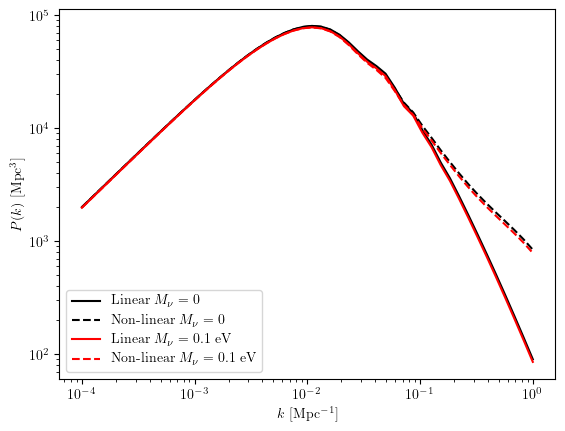

In [ ]:
plt.loglog(k,Pk_lin, 'k', label='Linear $M_\\nu = 0$')
plt.loglog(k,Pk_HMcode, 'k--',label='Non-linear $M_\\nu = 0$')

plt.loglog(k,Pk_mnu_lin,'r', label='Linear $M_\\nu = 0.1$ eV')
plt.loglog(k,Pk_mnu_HMcode, 'r--',label='Non-linear $M_\\nu = 0.1$ eV')

plt.xlabel('$k$ [Mpc$^{-1}]$')
plt.ylabel('$P(k)$ [Mpc$^{3}]$')
plt.legend()

Once again a small shift, but large enough to notice, let's look at the ratios:

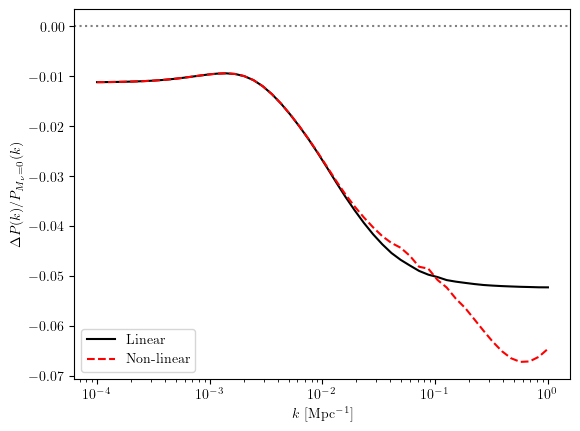

In [26]:
plt.axhline(0,color='0.5',linestyle=':')

plt.semilogx(k,Pk_mnu_lin/Pk_lin-1,'k', label='Linear')
plt.semilogx(k,Pk_mnu_HMcode/Pk_HMcode-1, 'r--',label='Non-linear')

plt.xlabel('$k$ [Mpc$^{-1}]$')
plt.ylabel('$\\Delta P(k) / P_{M_\\nu = 0}(k)$')

plt.legend()

So the effect of adding a (relatively large!) neutrino mass is on the same scale as the difference between different non-linear implementations. It therefore important to ensure you are using the correct non-linear treatment.

Currently, HMcode2020 is the most up to date treatment included in CLASS, and has its own set of parameters to e.g. account for baryonic feedback.

When investigating massive neutrino cosmologies, sometime also wishes to have the power spectrum of clustering matter (cdm+baryons) only. This can also be extracted using the same function by using the `cdmbar` keyword argument.

In [27]:
Pk_cb_mnu_lin = cosmo_mnu.get_pk_all(k,z, nonlinear=False,cdmbar=True)
Pk_cb_mnu_HMcode = cosmo_mnu.get_pk_all(k,z, nonlinear=True,cdmbar=True)

Text(0, 0.5, '$\\Delta P_m (k) / P_{cb}(k) - 1$')

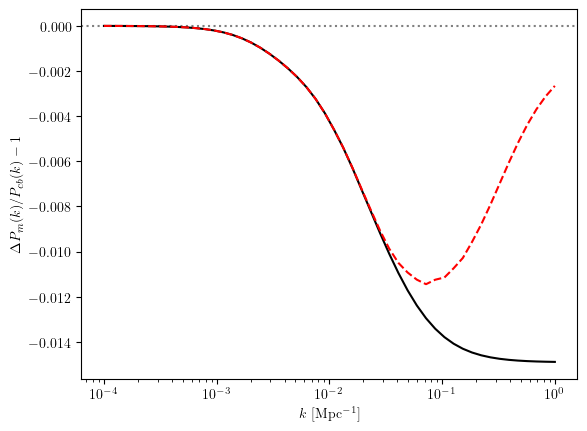

In [36]:
plt.axhline(0,color='0.5',linestyle=':')

plt.semilogx(k,Pk_mnu_lin/Pk_cb_mnu_lin-1,'k', label='Linear')
plt.semilogx(k,Pk_mnu_HMcode/Pk_cb_mnu_HMcode-1, 'r--',label='Non-linear')

plt.xlabel('$k$ [Mpc$^{-1}]$')
plt.ylabel('$\\Delta P_m (k) / P_{cb}(k) - 1$')


As the total matter power spectrum also includes the neutrinos which do not cluster as cold matter below their free streaming scale, it is suppressed at small scales compared to the clustering matter spectrum.

Finally, let us also look at how the interacting dark matter model affects the matter power spectrum. As the non-linear prescriptions are calibrated with CDM simulations, they are not necessarily reliable for exotic DM models. We therefore only use the linear power spectrum here.

In [38]:
cosmo_int = Class()
cosmo_int.set({'f_idm':0.9, 
               'm_idm':1e6, 
               'cross_idm_b':1e-40, 
               'n_index_idm_b': -4,
               'output':'mPk'})

Pk_int_lin = cosmo_int.get_pk_all(k,z, nonlinear=False)

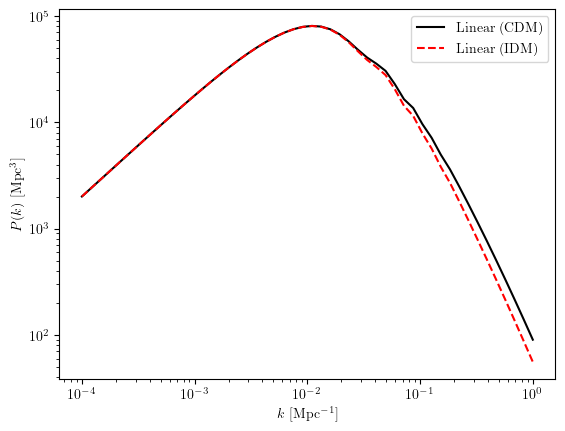

In [40]:
plt.loglog(k,Pk_lin, 'k', label='Linear (CDM)')

plt.loglog(k,Pk_int_lin,'--r', label='Linear (IDM)')

plt.xlabel('$k$ [Mpc$^{-1}]$')
plt.ylabel('$P(k)$ [Mpc$^{3}]$')
plt.legend()

Which visibly has a much larger impact than neutrinos.

Let's look at the ratio as well

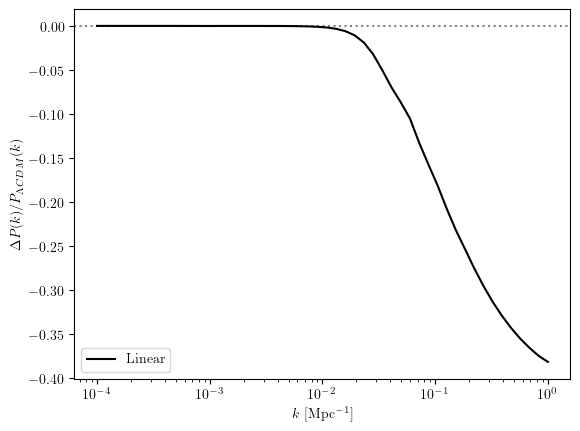

In [ ]:
plt.axhline(0,color='0.5',linestyle=':')

plt.semilogx(k,Pk_int_lin/Pk_lin-1,'k')

plt.xlabel('$k$ [Mpc$^{-1}]$')
plt.ylabel('$\\Delta P(k) / P_{\\Lambda CDM}(k)$')

plt.legend()

We get a ~40% reduction in linear power on scales k~1/Mpc